In [3]:
import requests
import pandas as pd
from datetime import date, timedelta

API_KEY = "API_KEY"

end_date = date.today() - timedelta(days=1)
start_date = end_date - timedelta(days=90)

url = f"https://api.massive.com/v2/aggs/ticker/AAPL/range/1/day/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey={API_KEY}"

data = requests.get(url).json()

apple_df = pd.DataFrame(data["results"])
apple_df.head()


,v,vw,o,c,h,l,t,n
0,49602794.0,273.3661,274.110,272.95,276.699,272.09,1763010000000,684410
1,47431331.0,273.1083,271.050,272.41,275.960,269.60,1763096400000,705592
2,45018260.0,267.9841,268.815,267.46,270.490,265.73,1763355600000,705791
3,45677278.0,267.7250,269.990,267.44,270.710,265.32,1763442000000,706583
4,40424492.0,269.3251,265.525,268.56,272.210,265.50,1763528400000,626377


In [4]:
apple_df["date"] = pd.to_datetime(apple_df["t"], unit="ms")
apple_df = apple_df.set_index("date").sort_index()

apple_df.index.name = "date"
apple_df.head()


,v,vw,o,c,h,l,t,n
date,,,,,,,,
2025-11-13 05:00:00,49602794.0,273.3661,274.110,272.95,276.699,272.09,1763010000000,684410
2025-11-14 05:00:00,47431331.0,273.1083,271.050,272.41,275.960,269.60,1763096400000,705592
2025-11-17 05:00:00,45018260.0,267.9841,268.815,267.46,270.490,265.73,1763355600000,705791
2025-11-18 05:00:00,45677278.0,267.7250,269.990,267.44,270.710,265.32,1763442000000,706583
2025-11-19 05:00:00,40424492.0,269.3251,265.525,268.56,272.210,265.50,1763528400000,626377


In [5]:
apple_df = apple_df.rename(columns={
    "o": "open",
    "c": "close",
    "h": "high",
    "l": "low",
})

apple_df[["open","close","high","low"]].head()


,open,close,high,low
date,,,,
2025-11-13 05:00:00,274.110,272.95,276.699,272.09
2025-11-14 05:00:00,271.050,272.41,275.960,269.60
2025-11-17 05:00:00,268.815,267.46,270.490,265.73
2025-11-18 05:00:00,269.990,267.44,270.710,265.32
2025-11-19 05:00:00,265.525,268.56,272.210,265.50


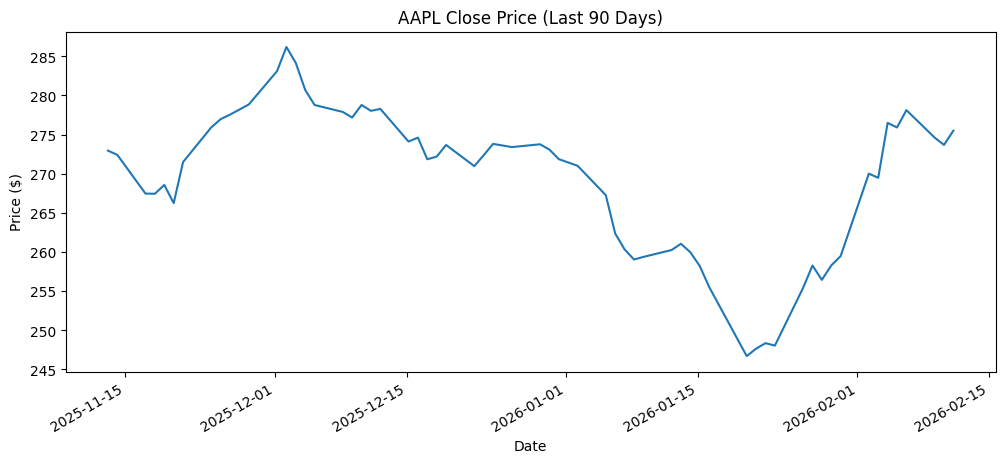

In [6]:
apple_df["close"].plot(figsize=(12,5), title="AAPL Close Price (Last 90 Days)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

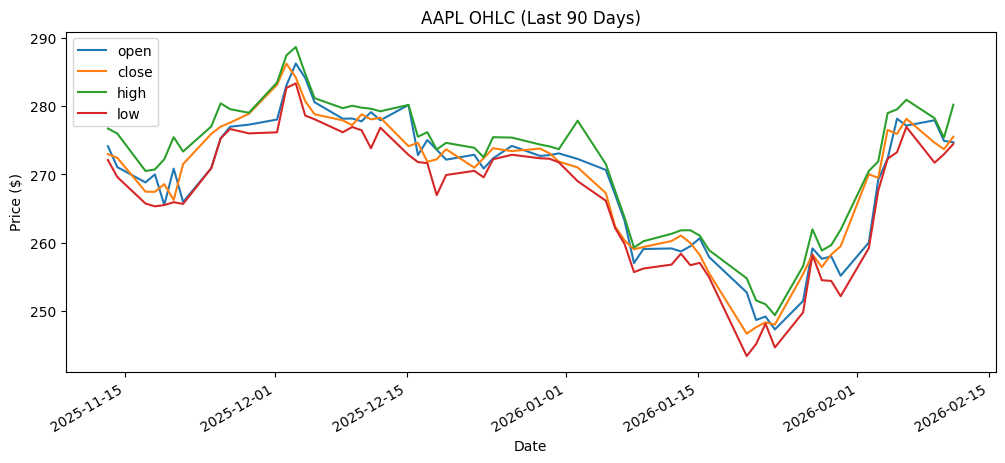

In [7]:
apple_df[["open","close","high","low"]].plot(figsize=(12,5), title="AAPL OHLC (Last 90 Days)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

In [8]:
from nbresult import ChallengeResult

result = ChallengeResult('apple',
    index_name=apple_df.index.name,
    index_type=apple_df.index.dtype,
    columns=apple_df.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /home/mcelik/.pyenv/versions/3.12.9/envs/workintech/bin/python
cachedir: .pytest_cache
rootdir: /home/mcelik/code/data-stock-market/tests
plugins: typeguard-4.4.2, anyio-4.8.0
collecting ... collected 3 items

test_apple.py::TestApple::test_apple_df_columns PASSED                   [ 33%]
test_apple.py::TestApple::test_apple_df_index_is_timestamp PASSED        [ 66%]
test_apple.py::TestApple::test_apple_df_index_name_is_date PASSED        [100%]

============================== 3 passed in 0.41s ===============================


💯 You can commit your code:

git add tests/apple.pickle

git commit -m 'Completed apple step'

git push origin master



In [10]:
git status
git add stocks.ipynb
git commit -m "Fetch AAPL last 90 days from Massive API and plot prices"
git push

SyntaxError: invalid syntax (3480248237.py, line 1)